Lecturer: Marton Sebok (Based on earlier work of Robert Kabai)

# Loan Default prediction
Using scikit-learn and historical performance data to predict whether a loan will default.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Financial-product-overview" data-toc-modified-id="Financial-product-overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Financial product overview</a></span></li><li><span><a href="#Brief-intro-to-classification" data-toc-modified-id="Brief-intro-to-classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Brief intro to classification</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Performance-metrics" data-toc-modified-id="Performance-metrics-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Performance metrics</a></span></li><li><span><a href="#General-Supervised-Learning-workflow" data-toc-modified-id="General-Supervised-Learning-workflow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>General Supervised Learning workflow</a></span></li></ul></li><li><span><a href="#Load-already-cleaned-data-from-previous-lecture" data-toc-modified-id="Load-already-cleaned-data-from-previous-lecture-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load already cleaned data from previous lecture</a></span></li><li><span><a href="#Convert-categorical-variables-to-individual-binaries" data-toc-modified-id="Convert-categorical-variables-to-individual-binaries-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Convert categorical variables to individual binaries</a></span></li><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train-test split</a></span></li><li><span><a href="#First-try-for-prediction-with-Logistic-Regression" data-toc-modified-id="First-try-for-prediction-with-Logistic-Regression-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>First try for prediction with Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Using-Logistic-Regression-from-Scikit-Learn" data-toc-modified-id="Using-Logistic-Regression-from-Scikit-Learn-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Using Logistic Regression from Scikit-Learn</a></span></li><li><span><a href="#Why-the-bad-performance?" data-toc-modified-id="Why-the-bad-performance?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Why the bad performance?</a></span></li><li><span><a href="#Exercise:-What-do-you-think-is-the-problem?" data-toc-modified-id="Exercise:-What-do-you-think-is-the-problem?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Exercise: What do you think is the problem?</a></span></li></ul></li><li><span><a href="#Dealing-with-class-imbalance" data-toc-modified-id="Dealing-with-class-imbalance-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Dealing with class imbalance</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Think-about-what-is-the-simplest-model-that-would-give-~85%-accuracy?-Would-that-be-a-useful-model?" data-toc-modified-id="Exercise:-Think-about-what-is-the-simplest-model-that-would-give-~85%-accuracy?-Would-that-be-a-useful-model?-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Exercise: Think about what is the simplest model that would give ~85% accuracy? Would that be a useful model?</a></span></li><li><span><a href="#Downsampling-the-training-set" data-toc-modified-id="Downsampling-the-training-set-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Downsampling the training set</a></span></li></ul></li><li><span><a href="#Prediction-after-solved-class-imbalance:-Logistic-Regression,-Decision-Tree" data-toc-modified-id="Prediction-after-solved-class-imbalance:-Logistic-Regression,-Decision-Tree-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Prediction after solved class imbalance: Logistic Regression, Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Visualizing-and-interpreting-a-Decision-Tree" data-toc-modified-id="Visualizing-and-interpreting-a-Decision-Tree-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Visualizing and interpreting a Decision Tree</a></span></li><li><span><a href="#Exercise:-Use-predicted-probabilities-with-a-different-threshold" data-toc-modified-id="Exercise:-Use-predicted-probabilities-with-a-different-threshold-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Exercise: Use predicted probabilities with a different threshold</a></span></li><li><span><a href="#Exercise:-Vary-the-max-depth-of-the-tree-from-1-to-10" data-toc-modified-id="Exercise:-Vary-the-max-depth-of-the-tree-from-1-to-10-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Exercise: Vary the max depth of the tree from 1 to 10</a></span></li></ul></li></ul></div>

## Financial product overview

** Asset Backed Securities**

First let's will learn about a very popular way to fund loans when the total size of the portfolio might be in the neighborhood of $1B. One of the widely used structure is called Asset Backed Securities. Let's take a look at a general structure for it:
![Securitization](img\securitization.png)

As we mentioned in the previous lecture there are multiple approaches to assess usually depend on the granularity of data available.
* Aggregated historical performance data can be used to create a high level assessment on different parts of the portfolio e.g. loans with more than 30 months maturity and more then 95% debt to income ratio are risky and we estimate 4% of them to default.
* Loan level historical performance data can be used to create a predictive model to make a prediction on each loan individually.

Cash flow from the assets are allocated using a waterfall structure to protect more senior notes from risk:

![Waterfall](img\waterfall.png)

For certain type of ABS we can have a contract which allows us to replace undesirable loans with better ones.
As you see the way this structure gives protection from losses works well in case the of systemic errors that our loan level predictive model might not even capture. 

*Just to note, data for Asset Backed Securities are usually private and confidential. They contain information that can not be shared outside the group doing the analysis. For this reason the dataset we are using is not actually data from an ABS but rather the LendingClub public personal loan dataset. For this short lecture it does not matter if the portfolio is securitized or not as we are working with the raw data.*

## Brief intro to classification

As mentioned in the previous lecture our final goal is to assess the riskiness of our investments. In this example we will use loan level historical performance data to create a predictive model to make a default prediction for each loan individually. The model will decide whether or not a loan is a good or a bad loan.
![Good_or_bad_credit](img\good_or_bad_credit.png)

In the general case we can formulate this question as a classification problem. In classification we observations with multiple features / descriptors (the two axis on the picture below) and two or more categories (the color of the dots in the picture below). We would like to learn what structure/region of the feature space will most likely result in observing which classs.

![Classification](img\classification.png)

Let's observe that creating a good separation (decision boundary) is not trivial as there might be an overlap between the regions. In this case using a straight line for a decision boundary would be called a `weak learner`, the black curve would be a `good fit` and the green wiggly line would be a model which overfits the data thus adds too much inportance to individual examples and learning even the noise.

### Logistic Regression

The first model we will try for predicting defaults is Logistic Regression. The model takes a linear combination of the input features and then applying a nonlinearity for generating the decision boundry. More formally:
$$ z = w_0 x_0 + w_1 x_1 +  ...  + w_n x_n = \sum_{i=0}^n w_i x_i = w^T x $$
where $x_0$ is always 1 by definition for convenience and the original features are contained by $x_1..x_n$.

The higher the value of `z`, the more sure we are that we should predict `1`, the lower the value of `z` the more sure we are that we should predict `0`. Using the sigmoid function on `z` constrains the value of `z` between `(0,1)`:
$$ sigmoid(z) = \frac{1}{1 + e^{-z}}$$

![Sigmoid](img\sigmoid.svg)

### Decision Trees

Another popular supervised learning algorithm is the Decision Tree. The idea is to partition the data space by binary splits searching for the best split that distinguishes regions for the class in question. 

In the search for splits the algorithm optimizes an impurity measure at each step creating another branch on the tree.

![DecisionTree](img\dtree2.png)
<center>Image source: https://dzone.com/refcardz/machine-learning-predictive?chapter=10 </center>

The most used impurity measures are as follows:
* Misclassification error: $1-p_k$
* Gini index: $G(S) = \sum_{k=1}^K p_k (1-p_k)$
* Entropy: H(S) = $- \sum_{k=1}^K p_k log(p_k)$

What are decision trees good at?
* Large datasets
* Numeric and categorical variables (depends on implementation)
* Human interpretable

### Performance metrics

**Confusion matrix**

We can construct a confusion matrix based on the correct and incorrect predictions of our model. Two very important measures are the True Positive Rate and False Positive Rate.

![ConfusionMatrix](img\confusion_matrix.png)

**Accuracy**

The accuracy of the model is probably the simplest metric we can come up with: it measures the ratio of correctly classified observation to all observations.

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN} = \frac{TP+TN}{no. observations} $$

**ROC curve**

We can construct the ROC curve by varying the decision threshold for predicting class `0` or `1` and drawing the resulting TPR / FPR values. A model with a higher area under the curve (AUC) is considered better.

![ROC](img\roc.png)
<center>Image source: https://docs.eyesopen.com/toolkits/cookbook/python/plotting/roc.html</center>

### General Supervised Learning workflow

The general workflow for supervised learning is as follows:
* We gather historical data to build the model on
* Split the data into two parts. Use random sampling!
    * A later part to train the model on 
    * A smaller part to evaluate the model's performance on
    * Question: what do you think is a good train/test split ratio?
* Build the model on the training data without ever touching the test data.
* Use the model and evaluate it's performance on the test data. We are basically simulating how the model performs on previously unseen data with unknown label. There are a lot of performance metrics used in the industry depending on the task at hand.
* Deploy the model and use it in production for unlabeled data

![SuperveisedLearningWorkflow](img\sup_learning_workflow.png)

## Load already cleaned data from previous lecture

In [47]:
import pandas as pd
data = pd.read_pickle('Lendmark_clean.pkl')

In [48]:
data = data.drop('last_pymnt_amnt', axis=1)

In [49]:
data.head()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,home_ownership,tax_liens,defaulted
0,5000.0,36,10.65,5000.0,2,24000.0,27.65,0.0,10,RENT,0.0,0
1,2500.0,60,15.27,2500.0,3,30000.0,1.00,0.0,0,RENT,0.0,1
2,2400.0,36,15.96,2400.0,3,12252.0,8.72,0.0,10,RENT,0.0,0
3,10000.0,36,13.49,10000.0,3,49200.0,20.00,0.0,10,RENT,0.0,0
4,3000.0,60,12.69,3000.0,2,80000.0,17.94,0.0,1,RENT,0.0,0


## Convert categorical variables to individual binaries
Many models can't deal with categorical type data and can only accept numerical variables thus we need to encode contained information numerically somehow.

In [50]:
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

**Something to think about:** Why would it be a bad idea to encode this variable with integer values 1-5?

The usual best practice is to encode a categorical variable of 5 unique values to 5 distinct binary columns (having values of 1 or 0). The resulting variable are sometimes called "dummy variables".

There is a built in Pandas function that can help us achieve this. Let's see how it works:

In [51]:
pd.get_dummies(data.home_ownership, prefix='home_ownership', prefix_sep='_').head()

,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


Let's create a version of the data wich contains the dummy variables but not the original one.

In [52]:
cols = data.columns.tolist()
cols.remove('home_ownership')

data_dummy = pd.get_dummies(data.home_ownership, prefix='home_ownership', prefix_sep='_')
data_dummy = data[cols].join(data_dummy)
data_dummy.head()

,loan_amnt,term,int_rate,funded_amnt,grade,annual_inc,dti,delinq_2yrs,emp_length,tax_liens,defaulted,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000.0,36,10.65,5000.0,2,24000.0,27.65,0.0,10,0.0,0,0,0,0,0,1
1,2500.0,60,15.27,2500.0,3,30000.0,1.00,0.0,0,0.0,1,0,0,0,0,1
2,2400.0,36,15.96,2400.0,3,12252.0,8.72,0.0,10,0.0,0,0,0,0,0,1
3,10000.0,36,13.49,10000.0,3,49200.0,20.00,0.0,10,0.0,0,0,0,0,0,1
4,3000.0,60,12.69,3000.0,2,80000.0,17.94,0.0,1,0.0,0,0,0,0,0,1


In [53]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39747 entries, 0 to 39753
Data columns (total 16 columns):
loan_amnt                  39747 non-null float64
term                       39747 non-null int64
int_rate                   39747 non-null float64
funded_amnt                39747 non-null float64
grade                      39747 non-null int64
annual_inc                 39747 non-null float64
dti                        39747 non-null float64
delinq_2yrs                39747 non-null float64
emp_length                 39747 non-null int64
tax_liens                  39747 non-null float64
defaulted                  39747 non-null int64
home_ownership_MORTGAGE    39747 non-null uint8
home_ownership_NONE        39747 non-null uint8
home_ownership_OTHER       39747 non-null uint8
home_ownership_OWN         39747 non-null uint8
home_ownership_RENT        39747 non-null uint8
dtypes: float64(7), int64(4), uint8(5)
memory usage: 5.1 MB


Now all variables are numerical. Some implementations of algorithms like decision trees can natively handle categorical variables but most algorithms and most implementaqtions can not. In case there is no self evident ordering of the categories that would make it straight forward to convert it to integer values, it is best to create dummy binaries. 

## Train-test split

In [54]:
from sklearn.model_selection import train_test_split

Let's separate the columns for the features and the response variable.
We'll store the features in a matrix and the response variable in a vector.

In [55]:
x_cols = data_dummy.columns.tolist()
x_cols.remove('defaulted')
y_col = 'defaulted'

X = data_dummy[x_cols].values
y = data_dummy[y_col].values

In [56]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (39747, 15)
Shape of y: (39747,)


In [57]:
print('Features of row 1: {}'.format(X[0,:]))
print('Response variable of row 1: {}'.format(y[0]))

Features of row 1: [  5.00000000e+03   3.60000000e+01   1.06500000e+01   5.00000000e+03
   2.00000000e+00   2.40000000e+04   2.76500000e+01   0.00000000e+00
   1.00000000e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00]
Response variable of row 1: 0


Now let's do the train/test split.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [59]:
print('Shape of X_train: {}'.format(X_train.shape))
print('Shape of X_test: {}'.format(X_test.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of y_test: {}'.format(y_test.shape))

Shape of X_train: (31797, 15)
Shape of X_test: (7950, 15)
Shape of y_train: (31797,)
Shape of y_test: (7950,)


In [60]:
print('Features of row 1: {}'.format(X_train[0,:]))
print('Response variable of row 1: {}'.format(y_train[0]))

Features of row 1: [  9.50000000e+03   3.60000000e+01   1.03600000e+01   9.50000000e+03
   2.00000000e+00   3.84000000e+04   1.10900000e+01   0.00000000e+00
   1.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
Response variable of row 1: 0


In [61]:
print('Features of row 1: {}'.format(X_test[0,:]))
print('Response variable of row 1: {}'.format(y_test[0]))

Features of row 1: [  3.00000000e+03   3.60000000e+01   1.26800000e+01   3.00000000e+03
   3.00000000e+00   1.50000000e+04   4.56000000e+00   0.00000000e+00
   1.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
Response variable of row 1: 0


## First try for prediction with Logistic Regression

** Code for plotting ROC curve and Confusion matrix **

In [64]:
# Draw ROC curve function

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def draw_roc_curve(actual_values, **predicted_probabilities):
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'r--', label='Random guessing')
    for name, pred in predicted_probabilities.items():
        fpr, tpr, thresholds = roc_curve(actual_values, pred)
        plt.plot(fpr, tpr, lw=2, label='ROC curve for %s' % name)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [65]:
# Draw Confusion Matrix function

import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Using Logistic Regression from Scikit-Learn
Let's try logistic regression and see how it performs.

In [69]:
from sklearn import linear_model,svm
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

lrmodel0 = linear_model.LogisticRegression(C=1000)
lrmodel0 = lrmodel0.fit(X_train, y_train)
pred_lr0_train = lrmodel0.predict(X_train)
prob_lr0_train = lrmodel0.predict_proba(X_train)[:,1]
pred_lr0_test = lrmodel0.predict(X_test)
prob_lr0_test = lrmodel0.predict_proba(X_test)[:,1]

In [70]:
print("Performance of the first Logistic Regression model:")
print("Accuracy (train): ", accuracy_score(y_train, pred_lr0_train) )
print("Area Under ROC curve (train):", roc_auc_score(y_train, prob_lr0_train) )
print("Accuracy (test): ", accuracy_score(y_test, pred_lr0_test) )
print("Area Under ROC curve (test):", roc_auc_score(y_test, prob_lr0_test) )

Performance of the first Logistic Regression model:
Accuracy (train):  0.857911123691
Area Under ROC curve (train): 0.542443291781
Accuracy (test):  0.855094339623
Area Under ROC curve (test): 0.548948986221


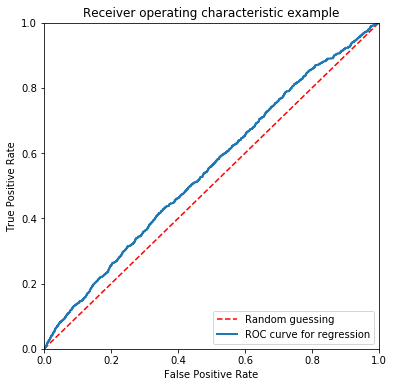

In [71]:
draw_roc_curve(y_test, regression=prob_lr0_test)

### Why the bad performance?

**A good 86% accuracy, nice! Or is it ?!**
* We are at 86% accuracy, which seems good just by itself.
* A random guess based on class frequency (no information gain) would be an AUC of 0.5, which we just bearly beat, meaning not much information gain.

It seems we still have a lot to improve...

**What is happening?**
Let's see a historgram of the predicted class probabilities:

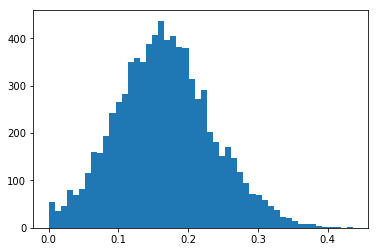

In [72]:
import matplotlib.pyplot as plt
plt.hist(lrmodel0.predict_proba(X_test)[:,1], bins=50)
plt.show()

In [73]:
print('The maximum default probability predicted for any loan: ', max(prob_lr0_test))

The maximum default probability predicted for any loan:  0.43617853409


Confusion matrix, without normalization
[[6798    0]
 [1152    0]]


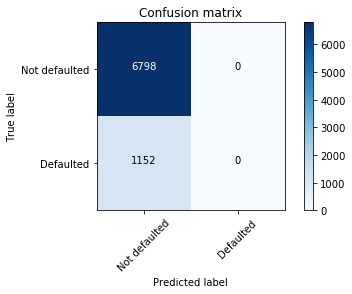

In [74]:
cm = confusion_matrix(y_test, pred_lr0_test)
classes = ['Not defaulted', 'Defaulted']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### Exercise: What do you think is the problem?

## Dealing with class imbalance

Let us examine how many positive/negative examples we have in the original dataset.

In [75]:
data_dummy.defaulted.value_counts()

0    34078
1     5669
Name: defaulted, dtype: int64

In [76]:
print("Ratio of negative examples: ", 1-sum(data_dummy.defaulted)/len(data_dummy.defaulted))

Ratio of negative examples:  0.857372883488


### Exercise: Think about what is the simplest model that would give ~85% accuracy? Would that be a useful model?

As we see defaulted loans represent less than 15% of the examples. The class imbalance problem occurs quite often and it provides the challenge that while we are usually interested in predicting the minotiry class (e.g. defaults) thus we have less information for the class in question.

### Downsampling the training set

There are multiple solutions for the class imbalance problem:
    * Downsampling: keep a smaller random sample of the majority class.
    * Upsampling: Duplicate records of the minority class.
    * Advanced methods: modifying the cost function, adding example weights, etc...
    
For more detail on techniques, I encourage you to check out this blog post: https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

For this lecture we will implement downsampling. 

Let's theck the shape of our training dataset after the split.

In [77]:
print(X_train.shape)

(31797, 15)


Now let's split the data by the class values.

In [78]:
df_def0 = X_train[y_train==0, :]
df_def1 = X_train[y_train==1, :]

In [79]:
print(df_def0.shape)
print(df_def1.shape)

(27280, 15)
(4517, 15)


We can use scikit-learn's `resample` function to generate a new sample from an array or a dataframe. As we are downsampling and not upsampling, we will sample without replacement.

In [80]:
from sklearn.utils import resample
df_def0_downsample = resample(df_def0, 
                                 replace=False,
                                 n_samples=len(df_def1), # matching the minority class (number of defaulted loans)
                                 random_state=1)

In [81]:
print(df_def0_downsample.shape)
print(df_def1.shape)

(4517, 15)
(4517, 15)


Now that we have the same number of examples for both the 0 and 1 classes we can combine the records again to one object.

In [82]:
import numpy as np
# Combine minority class with downsampled majority class
X_train = np.concatenate((df_def0_downsample, df_def1))
y_train = np.concatenate((np.zeros(len(df_def0_downsample)), np.ones(len(df_def1))))

In [83]:
print(X_train.shape)

(9034, 15)


In [84]:
print(y_train.shape)

(9034,)


**Something to think about:** 

Why did we only downsample the training dataset but not the test dataset?
We need class balance when training a model but we need the real class ratios for assessing the model's performance.

## Prediction after solved class imbalance: Logistic Regression, Decision Tree

In [85]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

### Logistic regression

In [86]:
lrmodel1 = linear_model.LogisticRegression(C=1000)
lrmodel1 = lrmodel1.fit(X_train, y_train)

In [87]:
pred_lr1_train = lrmodel1.predict(X_train)
prob_lr1_train = lrmodel1.predict_proba(X_train)[:,1]
pred_lr1_test = lrmodel1.predict(X_test)
prob_lr1_test = lrmodel1.predict_proba(X_test)[:,1]

Confusion matrix, without normalization
[[3467 3331]
 [ 349  803]]


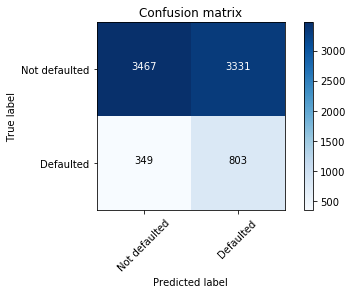

In [88]:
cm = confusion_matrix(y_test, pred_lr1_test)
classes = ['Not defaulted', 'Defaulted']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [89]:
print("Performance of the Logistic Regression model:")
print("Accuracy (train): ", accuracy_score(y_train, pred_lr1_train) )
print("Area Under ROC curve (train):", roc_auc_score(y_train, prob_lr1_train) )
print("Accuracy (test): ", accuracy_score(y_test, pred_lr1_test) )
print("Area Under ROC curve (test):", roc_auc_score(y_test, prob_lr1_test) )

Performance of the Logistic Regression model:
Accuracy (train):  0.605047597963
Area Under ROC curve (train): 0.645853420985
Accuracy (test):  0.537106918239
Area Under ROC curve (test): 0.648082641749


** ROC curve comparing the model created before and after class imbalance correction**

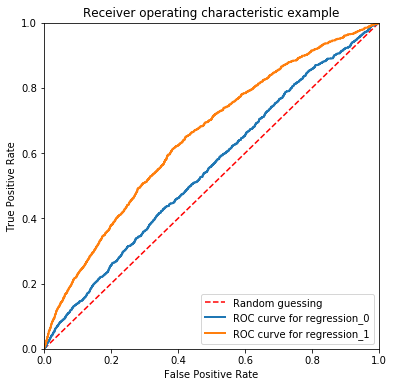

In [90]:
draw_roc_curve(y_test, regression_0=prob_lr0_test, regression_1=prob_lr1_test)

### Decision Tree

Use max depth of 4 with min sample leafs 5

In [91]:
from sklearn import tree

In [92]:
treemodel = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf =5)
treemodel = treemodel.fit(X_train, y_train)
treemodel

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
pred_tree_train = treemodel.predict(X_train)
prob_tree_train = treemodel.predict_proba(X_train)[:,1]
pred_tree_test = treemodel.predict(X_test)
prob_tree_test = treemodel.predict_proba(X_test)[:,1]

In [94]:
print("Performance of the Decision Tree model:")
print("Accuracy (train): ", accuracy_score(y_train, pred_tree_train) )
print("Area Under ROC curve (train):", roc_auc_score(y_train, prob_tree_train) )
print("Accuracy (test): ", accuracy_score(y_test, pred_tree_test) )
print("Area Under ROC curve (test):", roc_auc_score(y_test, prob_tree_test) )

Performance of the Decision Tree model:
Accuracy (train):  0.631945981846
Area Under ROC curve (train): 0.679008247151
Accuracy (test):  0.51358490566
Area Under ROC curve (test): 0.660865774962


Confusion matrix, without normalization
[[3223 3575]
 [ 292  860]]


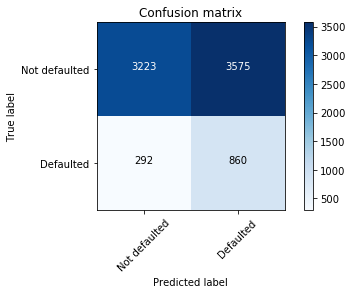

In [95]:
cm = confusion_matrix(y_test, pred_tree_test)
classes = ['Not defaulted', 'Defaulted']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

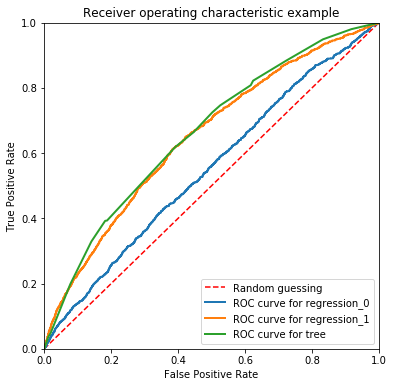

In [96]:
draw_roc_curve(y_test, regression_0=prob_lr0_test, regression_1=prob_lr1_test, tree=prob_tree_test)

### Visualizing and interpreting a Decision Tree
The learned internal tree structure of a decision tree can be visualized with a python component called graphviz. Let's examine the structure and see how we can interpret the resulting decision rules. Color coding can help us see the decision and it's confidence.

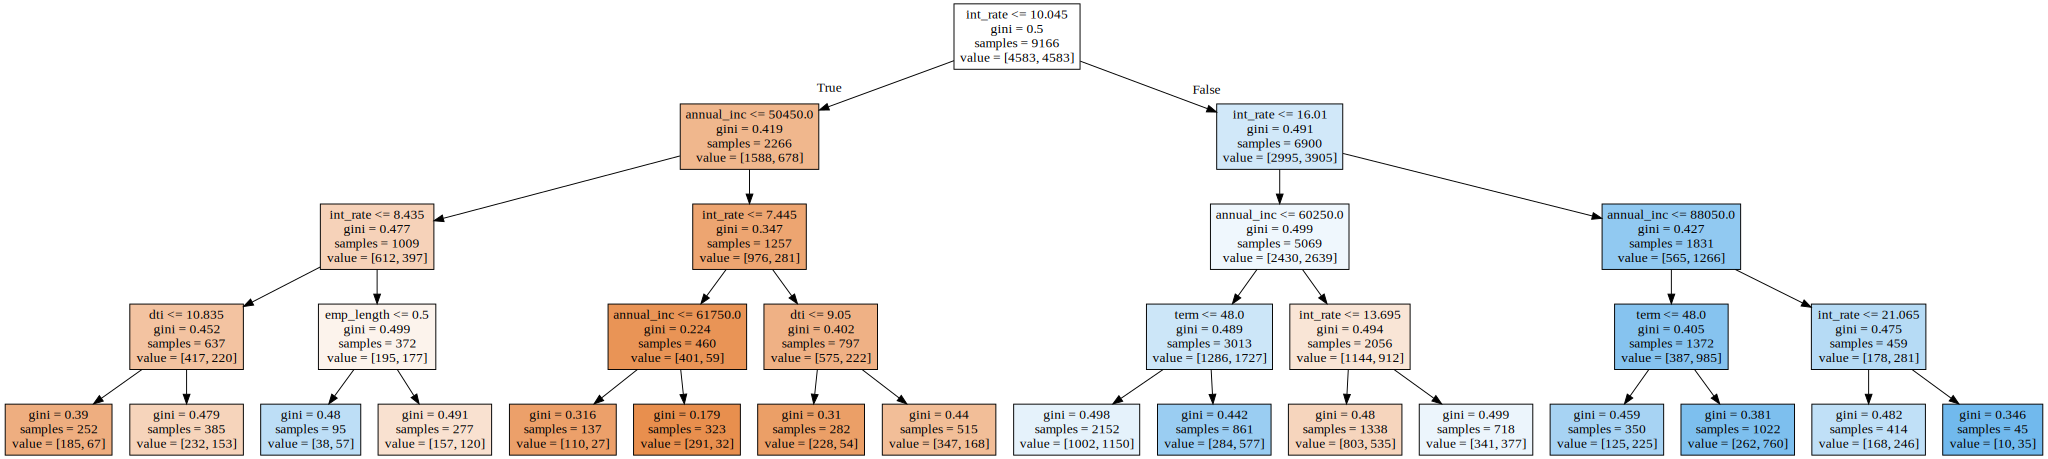

In [46]:
import graphviz 
dot_data = tree.export_graphviz(treemodel,
                                feature_names=x_cols,
                                out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data) 
graph

### Exercise: Use predicted probabilities with a different threshold

* Use the vectors of predicted default probabilities with a different decision cutoff threshold than 0.5 to make prediction. Change the threshold so that we identify more defaulted loans.
* What effect would this have of False Positives?
* Create a confusion matrix for all three new predictions and see how they changed compared to the first runs.

`Hint: use the probabilities in prob_lr0_test, prob_lr1_test, prob_tree_test, create new vectors of the same size with 0/1 values based on the decision threshold you choose.`

### Exercise: Vary the max depth of the tree from 1 to 10
* Create a series of decision trees with max depths from 1 to 10.
* For each tree calculate the AUC value for both the train and test set. Store the train AUC values in a vector called `train_auc` and the test AUC values in a vector called `test_auc`.
* Plot the two curves and check the results.


`Hint: use a for loop where in each iteration you very the max depth`